# Assessment 2 Neural Network Implementation
## 1. Setting up initial network (basic parameters)
Just a basic neural network with no adjustements based on observations. Adam optimization, but other than that the model is basically bone stock. From this model, a confusion matrix and other graphs can be made to analyze what optimizations can be made.

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam

# Load the FashionMNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalize the pixel values to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the CNN model
def create_cnn_model():
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

model = create_cnn_model()

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

Training and evaluation

Epoch 1/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.4705 - accuracy: 0.8289 - val_loss: 0.3532 - val_accuracy: 0.8714
Epoch 2/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.3137 - accuracy: 0.8852 - val_loss: 0.3003 - val_accuracy: 0.8922
Epoch 3/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.2681 - accuracy: 0.9001 - val_loss: 0.3013 - val_accuracy: 0.8903
Epoch 4/10
1500/1500 [==============================] - 22s 15ms/step - loss: 0.2352 - accuracy: 0.9120 - val_loss: 0.2651 - val_accuracy: 0.9011
Epoch 5/10
1500/1500 [==============================] - 24s 16ms/step - loss: 0.2088 - accuracy: 0.9226 - val_loss: 0.2715 - val_accuracy: 0.8986
Epoch 6/10
1500/1500 [==============================] - 23s 16ms/step - loss: 0.1834 - accuracy: 0.9327 - val_loss: 0.2460 - val_accuracy: 0.9132
Epoch 7/10
1500/1500 [==============================] - 20s 14ms/step - loss: 0.1623 - accuracy: 0.9400 - val_loss: 0.2415 -

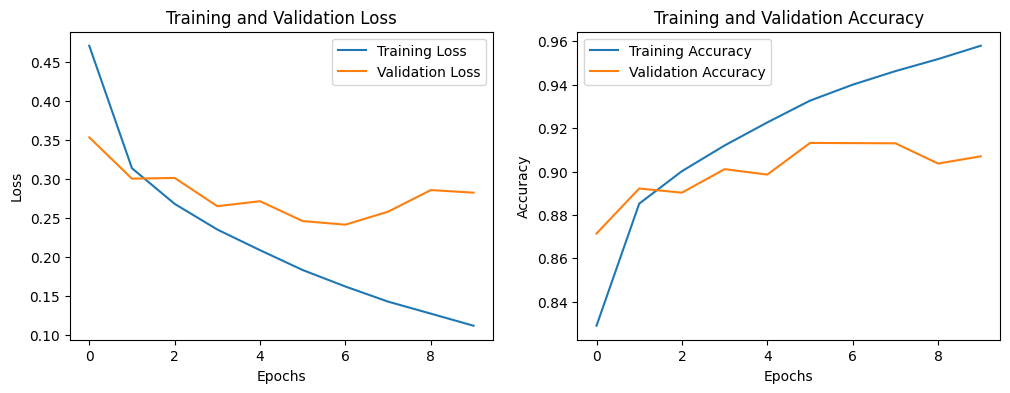

Test accuracy: 0.9075
313/313 [==============================] - 1s 4ms/step


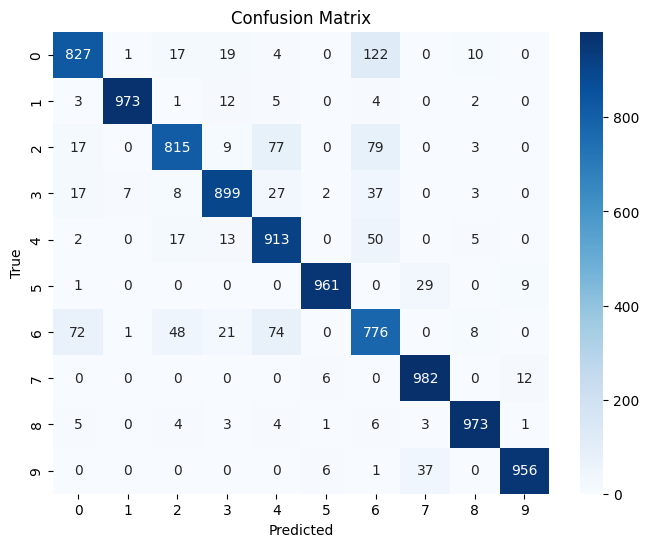

In [ ]:
# Training the model
history = model.fit(x_train[..., np.newaxis], y_train, epochs=10, validation_split=0.2)

# Plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    plt.show()

plot_training_history(history)

# Model evaluation
test_loss, test_accuracy = model.evaluate(x_test[..., np.newaxis], y_test, verbose=0)
print(f'Test accuracy: {test_accuracy:.4f}')

# Confusion matrix
y_pred = model.predict(x_test[..., np.newaxis])
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Clearly there is a lot of work to be done. The confusion matrix indicates that the model struggles with differentiating the `T-shirt/top` class and the `Shirt` class; this is to be expected, as the two are incredibly similar. Before adjusting the weights, I will increase the number of filters by doubling the exising number to see if picking up a greater number of features (such as a collar, or the shape of a T-shirt) will help the model with differentiating the two.

In [ ]:
# Define the CNN model
def create_cnn_model_02():
    model = keras.Sequential([
        layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

model = create_cnn_model_02()

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 3200)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

Epoch 1/10
1500/1500 [==============================] - 31s 21ms/step - loss: 0.4563 - accuracy: 0.8339 - val_loss: 0.3291 - val_accuracy: 0.8801
Epoch 2/10
1500/1500 [==============================] - 31s 21ms/step - loss: 0.3036 - accuracy: 0.8896 - val_loss: 0.2896 - val_accuracy: 0.8953
Epoch 3/10
1500/1500 [==============================] - 32s 21ms/step - loss: 0.2539 - accuracy: 0.9049 - val_loss: 0.2989 - val_accuracy: 0.8925
Epoch 4/10
1500/1500 [==============================] - 32s 21ms/step - loss: 0.2161 - accuracy: 0.9191 - val_loss: 0.2719 - val_accuracy: 0.9044
Epoch 5/10
1500/1500 [==============================] - 32s 21ms/step - loss: 0.1896 - accuracy: 0.9287 - val_loss: 0.2874 - val_accuracy: 0.8992
Epoch 6/10
1500/1500 [==============================] - 32s 21ms/step - loss: 0.1631 - accuracy: 0.9378 - val_loss: 0.2686 - val_accuracy: 0.9010
Epoch 7/10
1500/1500 [==============================] - 32s 21ms/step - loss: 0.1402 - accuracy: 0.9470 - val_loss: 0.2432 -

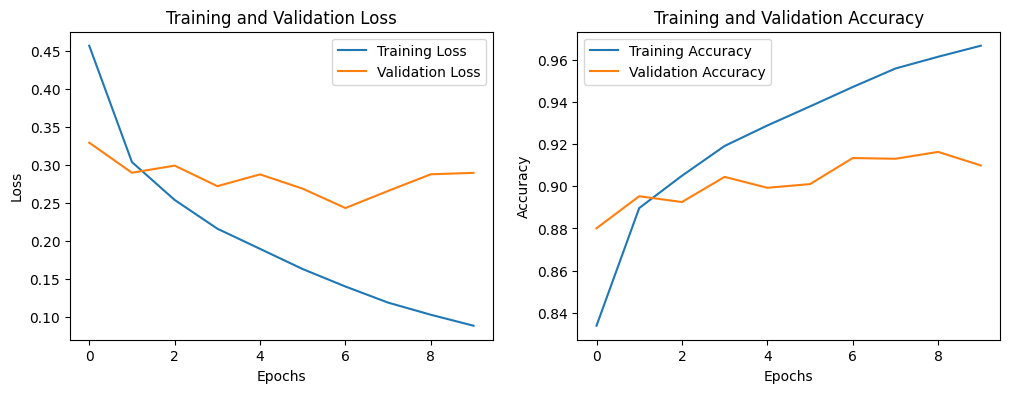

Test accuracy: 0.9040
313/313 [==============================] - 2s 7ms/step


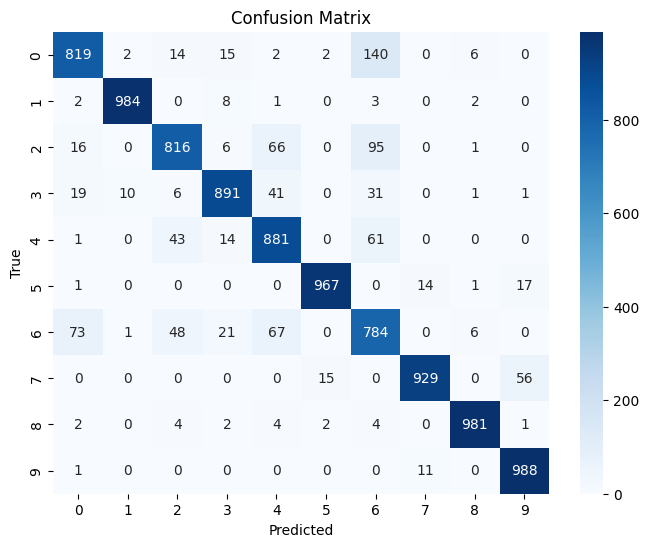

In [ ]:
# Training the model
history = model2.fit(x_train[..., np.newaxis], y_train, epochs=10, validation_split=0.2)

# Plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    plt.show()

plot_training_history(history)

# Model evaluation
test_loss, test_accuracy = model2.evaluate(x_test[..., np.newaxis], y_test, verbose=0)
print(f'Test accuracy: {test_accuracy:.4f}')

# Confusion matrix
y_pred = model2.predict(x_test[..., np.newaxis])
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Better, but the model still has 140 false positives where it classified a Shirt as a T-shirt, and 73 fale positives where it did the inverse. By adjusting the weights to give more importance to the T-shirt and Shirt classes the model should hopefully improve in its ability to differentiate the two.

Epoch 1/10
1875/1875 [==============================] - 33s 17ms/step - loss: 1.2079 - accuracy: 0.7712
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.8704 - accuracy: 0.8511
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.7491 - accuracy: 0.8736
Epoch 4/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.6704 - accuracy: 0.8873
Epoch 5/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.5891 - accuracy: 0.8997
Epoch 6/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.5141 - accuracy: 0.9101
Epoch 7/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.4562 - accuracy: 0.9187
Epoch 8/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.3938 - accuracy: 0.9288
Epoch 9/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.3563 - accuracy: 0.9351
Epoch 10/10
1875/1875 [==============================] - 37s 20m

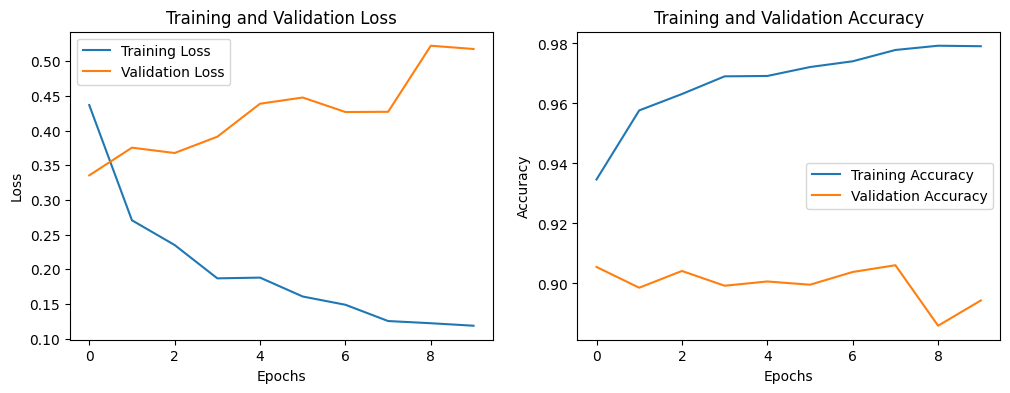

Test accuracy: 0.8954
313/313 [==============================] - 2s 7ms/step


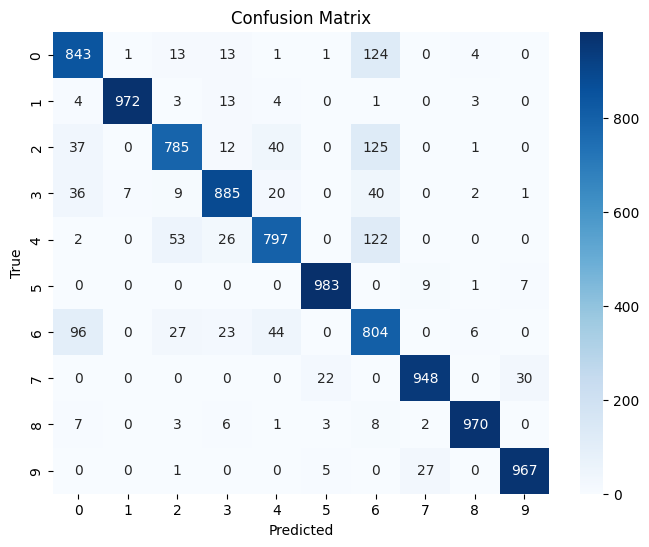

In [ ]:
class_weight = {0: 5.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 10.0, 7: 1.0, 8: 1.0, 9: 1.0}
model.fit(x_train, y_train, class_weight=class_weight, epochs=10)
# Training the model
history = model2.fit(x_train[..., np.newaxis], y_train, class_weight=class_weight, epochs=10, validation_split=0.2)

# Plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    plt.show()

plot_training_history(history)

# Model evaluation
test_loss, test_accuracy = model2.evaluate(x_test[..., np.newaxis], y_test, verbose=0)
print(f'Test accuracy: {test_accuracy:.4f}')

# Confusion matrix
y_pred = model2.predict(x_test[..., np.newaxis])
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


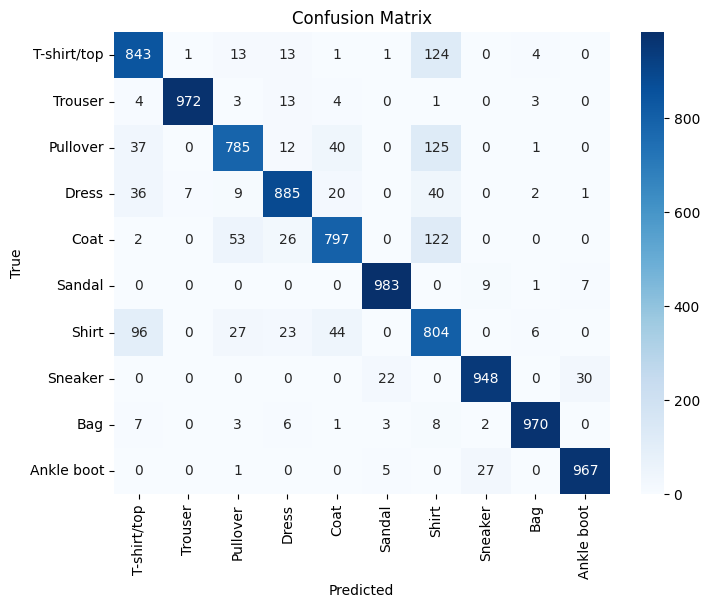

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Epoch 1/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0441 - accuracy: 0.9871
Epoch 2/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0351 - accuracy: 0.9893
Epoch 3/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0421 - accuracy: 0.9870
Epoch 4/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0393 - accuracy: 0.9882
Epoch 5/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0352 - accuracy: 0.9894
Epoch 6/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0342 - accuracy: 0.9897
Epoch 7/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0316 - accuracy: 0.9905
Epoch 8/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0319 - accuracy: 0.9905
Epoch 9/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0261 - accuracy: 0.9923
Epoch 10/10
1875/1875 [==============================] - 44s 24m

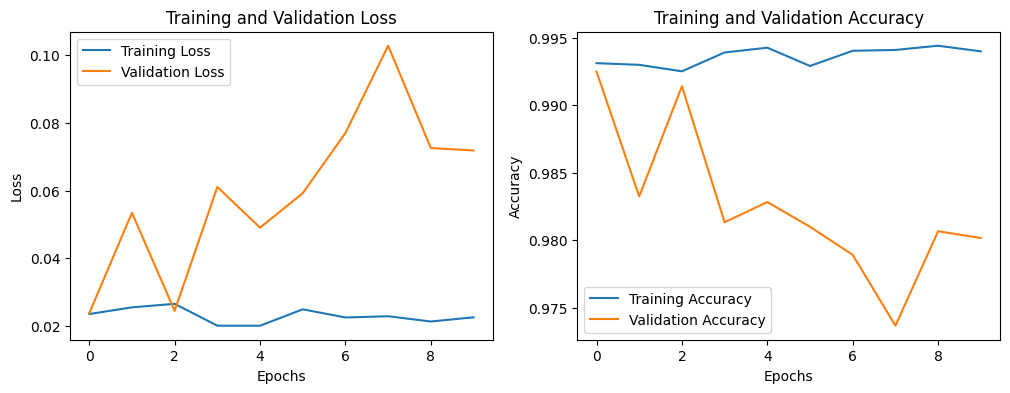

Test accuracy: 0.9060
313/313 [==============================] - 3s 9ms/step


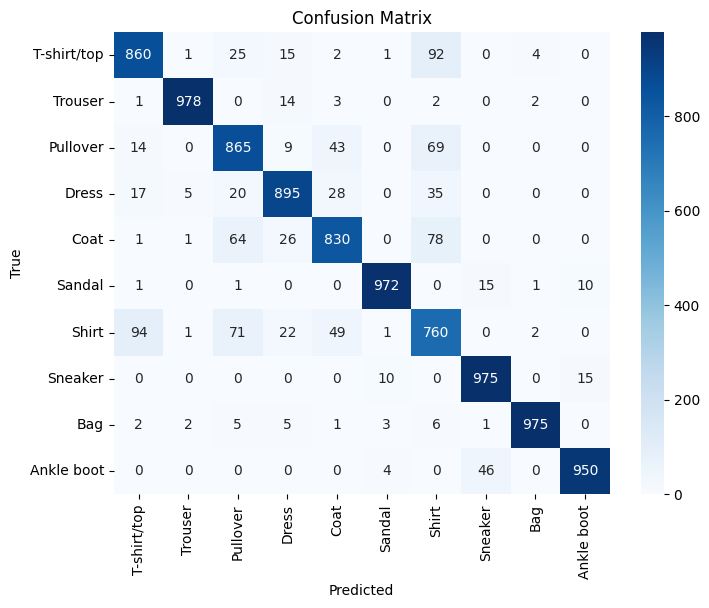

In [ ]:
class_weight = {0: 2.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 2.0, 7: 1.0, 8: 1.0, 9: 1.0}
model.fit(x_train, y_train, class_weight=class_weight, epochs=10)
# Training the model
history = model.fit(x_train[..., np.newaxis], y_train, class_weight=class_weight, epochs=10, validation_split=0.2)

# Plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    plt.show()

plot_training_history(history)

# Model evaluation
test_loss, test_accuracy = model.evaluate(x_test[..., np.newaxis], y_test, verbose=0)
print(f'Test accuracy: {test_accuracy:.4f}')

# Confusion matrix
y_pred = model.predict(x_test[..., np.newaxis])
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

A great improvement in the false positive rate on T-shirts! Now that the model has higher weights on T-shirts and Shirts the false positive rate has gone down. Now the model can be optimized to find good values for the kernel size, padding and number of epochs. This process takes a **very** long time. When optimizing, the code took over 3 hours to run on my machine. The resulting model is saved to a local directory, so the following code should not be run as it would take too long.

In [ ]:
# Define the CNN model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
def create_cnn_model_03(ker,pad,n_epo):
    model = Sequential([
        Conv2D(64, kernel_size=ker, padding=pad, activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train.reshape(-1, 28, 28, 1), y_train, epochs=n_epo, validation_data=(x_test.reshape(-1, 28, 28, 1), y_test))
    return model

In [ ]:
# Hyperparameter optimization
best_accuracy = 0
best_model = None

# Hyperparameter search space
kernel_sizes = [3, 5, 7]
padding_options = ['valid', 'same']
epochs = [5, 10, 15]

for kernel_size in kernel_sizes:
    for padding in padding_options:
        for num_epochs in epochs:
            print(f"Training with kernel size {kernel_size}, padding {padding}, and {num_epochs} epochs.")
            model = create_cnn_model_03(kernel_size, padding, num_epochs)
            _, accuracy = model.evaluate(x_test.reshape(-1, 28, 28, 1), y_test)
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_model = model

print("Best model accuracy:", best_accuracy)

Training with kernel size 3, padding valid, and 5 epochs.
Epoch 1/5
1875/1875 [==============================] - 48s 25ms/step - loss: 0.4254 - accuracy: 0.8449 - val_loss: 0.3278 - val_accuracy: 0.8804
Epoch 2/5
1875/1875 [==============================] - 50s 27ms/step - loss: 0.2804 - accuracy: 0.8972 - val_loss: 0.3037 - val_accuracy: 0.8876
Epoch 3/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.2332 - accuracy: 0.9138 - val_loss: 0.2506 - val_accuracy: 0.9075
Epoch 4/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.1970 - accuracy: 0.9262 - val_loss: 0.2613 - val_accuracy: 0.9060
Epoch 5/5
313/313 [==============================] - 3s 10ms/step - loss: 0.2721 - accuracy: 0.9078
Training with kernel size 3, padding valid, and 10 epochs.
Epoch 1/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.4271 - accuracy: 0.8443 - val_loss: 0.3479 - val_accuracy: 0.8688
Epoch 2/10
1875/1875 [==============================] - 5

kernel 3, padding same, 10 epocohs

In [ ]:
def create_cnn_model_03(ker,pad,n_epo):
    model = Sequential([
        Conv2D(64, kernel_size=ker, padding=pad, activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train.reshape(-1, 28, 28, 1), y_train, epochs=n_epo, validation_data=(x_test.reshape(-1, 28, 28, 1), y_test))
    return model

In [ ]:
best_model = create_cnn_model_03(3,"same",10)
best_model.summary()

Epoch 1/10
1875/1875 [==============================] - 18s 4ms/step - loss: 0.3877 - accuracy: 0.8590 - val_loss: 0.2920 - val_accuracy: 0.8957
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2502 - accuracy: 0.9080 - val_loss: 0.2953 - val_accuracy: 0.8895
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2079 - accuracy: 0.9233 - val_loss: 0.2539 - val_accuracy: 0.9061
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1730 - accuracy: 0.9359 - val_loss: 0.2347 - val_accuracy: 0.9204
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1443 - accuracy: 0.9460 - val_loss: 0.2174 - val_accuracy: 0.9244
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1203 - accuracy: 0.9546 - val_loss: 0.2331 - val_accuracy: 0.9240
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0992 - accuracy: 0.9635 - val_loss: 0.2642 - val_accur

In [ ]:
best_model.save("best_model.keras")

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0870 - accuracy: 0.9772
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0621 - accuracy: 0.9834
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0553 - accuracy: 0.9851
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0445 - accuracy: 0.9878
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0468 - accuracy: 0.9871
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0424 - accuracy: 0.9885
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0390 - accuracy: 0.9893
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0333 - accuracy: 0.9910
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0342 - accuracy: 0.9906
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.028

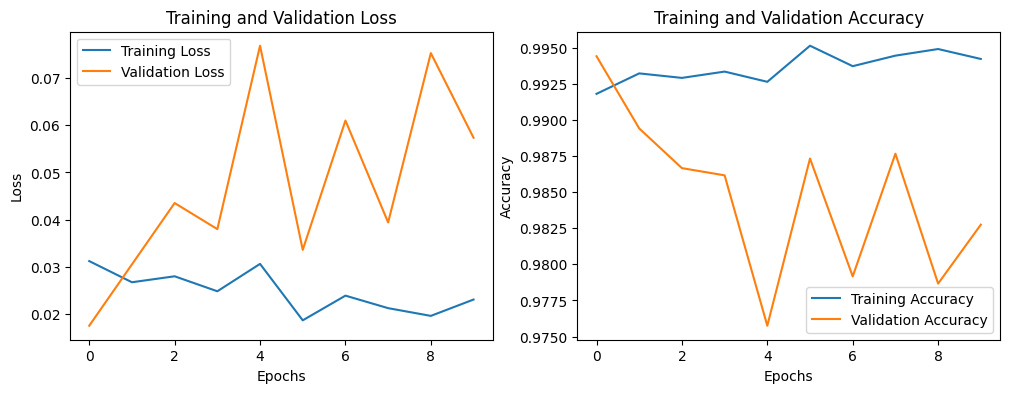

Test accuracy: 0.1020
313/313 [==============================] - 1s 2ms/step


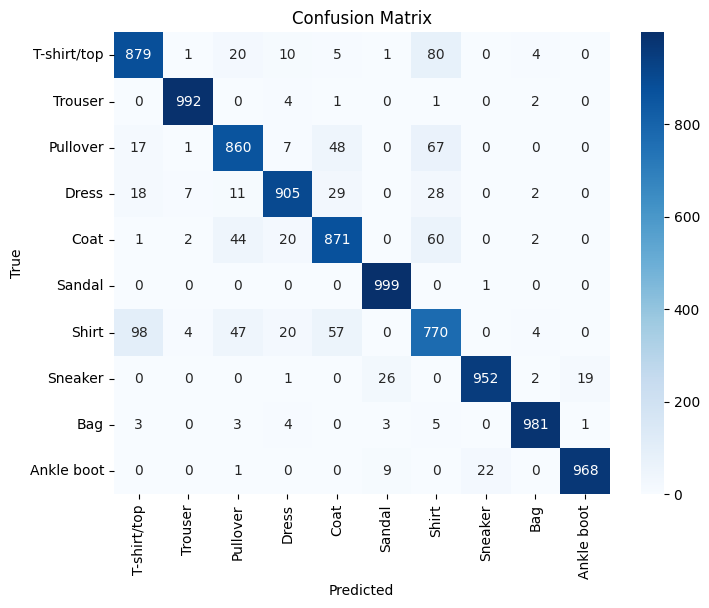

In [ ]:
class_weight = {0: 2.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 2.0, 7: 1.0, 8: 1.0, 9: 1.0}
best_model.fit(x_train, y_train, class_weight=class_weight, epochs=10)
# Training the model
history = best_model.fit(x_train[..., np.newaxis], y_train, class_weight=class_weight, epochs=10, validation_split=0.2)

# Plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    plt.show()

plot_training_history(history)

# Model evaluation
test_loss, test_accuracy = model.evaluate(x_test[..., np.newaxis], y_test, verbose=0)
print(f'Test accuracy: {test_accuracy:.4f}')

# Confusion matrix
y_pred = best_model.predict(x_test[..., np.newaxis])
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [7]:
best_model = tf.keras.models.load_model("best_model.keras")

In [ ]:
original_weights = best_model.get_weights()
print(original_weights)

[array([[[[ 0.0710848 ,  0.01810215,  0.1835326 , -0.03668607,
           0.13412863, -0.06565943, -0.38489887,  0.11605503,
          -0.15137903,  0.19498126,  0.33748326, -0.2023924 ,
          -0.01949629,  0.02169337, -0.02631142, -0.15131643,
          -0.1799872 ,  0.07321235, -0.05738668,  0.10881408,
           0.10271536, -0.01211311, -0.11202302,  0.04261825,
           0.1647612 ,  0.03014441, -0.05221418,  0.06573493,
           0.30040237,  0.09434769, -0.15016839,  0.1351803 ,
           0.34918654,  0.283291  , -0.04534413, -0.01836049,
          -0.08614863, -0.09112584, -0.05061558, -0.34756997,
          -0.72026896, -0.04542039, -0.38441816, -0.04488017,
          -0.12854283,  0.262498  , -0.31692702,  0.00743638,
          -0.0785777 ,  0.02680379,  0.20685078, -0.3875679 ,
           0.06299343,  0.10116998,  0.16957717, -0.28832543,
          -0.01995296,  0.18136546,  0.06823744,  0.37306395,
          -0.24309498, -0.1505835 , -0.08887514, -0.11339414]],

    

Another improvement in the prediction rate. However, it is concerning that the accuracy fluctuates so heavily.

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load your pre-trained model using your provided function
model = best_model

# Define the range of values for weight changes (e.g., -1 to 1)
weight_range = np.linspace(-1, 1, 50)

# Initialize an empty array to store the loss values
loss_values = np.zeros((len(weight_range), len(weight_range)))

# Make a copy of the original model weights
original_weights = model.get_weights()

# Assuming you have x_train, y_train, x_test, and y_test already defined

# Iterate over the weight combinations and compute the loss
for i, w1 in enumerate(weight_range):
    for j, w2 in enumerate(weight_range):
        # Create a copy of the original weights to avoid modifying them
        modified_weights = [w.copy() for w in original_weights]

        # Update the Conv2D layer with the current combinations
        modified_weights[0] = w1 * original_weights[0]
        modified_weights[2] = w2 * original_weights[2]

        # Set the modified weights to the model
        model.set_weights(modified_weights)

        # Train the model for a few epochs (e.g., 5) to see the loss landscape
        model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), verbose=0)

        # Calculate and store the loss
        loss_values[i, j] = model.evaluate(x_test, y_test, verbose=0)[0]

# Restore the original model weights
model.set_weights(original_weights)

# Create a 2D contour plot of the loss landscape
plt.figure()
contour = plt.contour(weight_range, weight_range, loss_values, levels=20, cmap='viridis')
plt.clabel(contour, inline=1, fontsize=10)
plt.xlabel('Weight Change in Conv2D Layer (w1)')
plt.ylabel('Weight Change in Second Conv2D Layer (w2)')
plt.title('Loss Landscape')

# Show the plot
plt.show()


## Preprocessing an image for prediction
As the model is trained on 28x28 greyscale images, any image that I want to predict needs to be converted into this format. This is easily done through Python.

(-0.5, 27.5, 27.5, -0.5)

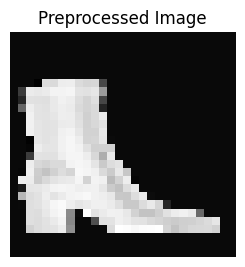

In [50]:
import cv2
import numpy as np

# Load and resize the image
input_image = cv2.imread('ankleboot.jpg', cv2.IMREAD_GRAYSCALE)  # Convert to grayscale

# Resize the image to 28x28 pixels
input_image = cv2.resize(input_image, (28, 28))

# Normalize the pixel values to the [0, 1] range
input_image = input_image.astype('float32') / 255.0

# Reshape the image to match the model's input shape
input_image = np.reshape(input_image, (1, 28, 28, 1))  # Add batch dimension
input_image = 255 - input_image
# Now, you can use this preprocessed image for prediction
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Preprocessed Image")
plt.imshow(input_image[0, :, :, 0], cmap="gray")  # Assuming input_image has shape (1, 28, 28, 1)
plt.axis('off')

In [49]:
import numpy as np

# Assuming you have loaded and preprocessed your input image and loaded your model

# Make predictions
predictions = best_model.predict(input_image)

# Get the predicted class
predicted_class = np.argmax(predictions, axis=1)[0]

# Get class probabilities
class_probabilities = predictions[0]

# Get class labels for Fashion MNIST (replace with your own labels if needed)
class_labels = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Get the predicted class label
predicted_label = class_labels[predicted_class]

# Print the predicted class label and class probabilities
print(f"Predicted Class: {predicted_label}")
print("Class Probabilities:")
for i, label in enumerate(class_labels):
    print(f"{label}: {class_probabilities[i]:.4f}")

# You can also display more detailed information or save the results to a file if needed


1/1 [==============================] - 0s 32ms/step
Predicted Class: T-shirt/top
Class Probabilities:
T-shirt/top: 1.0000
Trouser: 0.0000
Pullover: 0.0000
Dress: 0.0000
Coat: 0.0000
Sandal: 0.0000
Shirt: 0.0000
Sneaker: 0.0000
Bag: 0.0000
Ankle boot: 0.0000
